In [28]:
import re
import itertools

import difflib
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

### Загрузим датафрейм, который содержит версии функций до и после изменений

In [3]:
data = pd.read_csv('scikit-learn_issues_functions_versions_newest.tsv', sep='\t')
data.shape

(2529, 11)

### Создадим фукнцию, на основе кода из pyastsim, которая будет считать получать normed_content из текста (а не из файла, как сделано в pyastsim)

In [4]:
from ast import parse
import astunparse
from pyastsim.pyastsim import NormFunctions, NormIdentifiers
from pyastsim.pyastsim import get_pair_stats


def get_normed_content_for_src(filename, src, func=None):
    tree = parse(src)

    tree = NormFunctions(func=func).visit(tree)
    tree = NormIdentifiers().visit(tree)

    return (filename, astunparse.unparse(tree))

### Почистим фукнции от комментариев и докстрингов

In [6]:
def remove_comments(code):
    lines = code.split('\n')
    return '\n'.join([line for line in lines if not line.strip().startswith('#')])

In [7]:
signature_body_regex = r'\b(def [\s\S]+?)\s+[\"\']{3}[\s\S]+[\"\']{3}\n*(\n.+)'

In [12]:
data['before_merge_clean'] = data['before_merge'] \
    .apply(lambda x: remove_comments(re.sub(signature_body_regex, r'\1\2', x)))

In [13]:
data['after_merge_clean'] = data['after_merge'] \
    .apply(lambda x: remove_comments(re.sub(signature_body_regex, r'\1\2', x)))

In [19]:
func_sources = data[['before_merge_clean', 'after_merge_clean', 'function_name']].values
len(func_sources)

2529

### Удалим лишние отступы

In [21]:
for func_index, (fs1, fs2, func_name) in enumerate(func_sources):
    for version_index, fs in enumerate([fs1, fs2]):
        fs_lines = fs.split('\n')
        indent = len(fs_lines[0]) - len(fs_lines[0].lstrip())

        func_sources[func_index][version_index] = '\n'.join([fs_line[indent:] for fs_line in fs_lines])

In [22]:
print(func_sources[0][0])
print(func_sources[0][1])

def fit(self, X, y):
    if self.metric == 'precomputed':
        raise ValueError("Precomputed is not supported.")
    if self.metric == 'manhattan':
        X, y = self._validate_data(X, y, accept_sparse=['csc'])
    else:
        X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc'])
    is_X_sparse = sp.issparse(X)
    if is_X_sparse and self.shrink_threshold:
        raise ValueError("threshold shrinking not supported"
                         " for sparse input")
    check_classification_targets(y)

    n_samples, n_features = X.shape
    le = LabelEncoder()
    y_ind = le.fit_transform(y)
    self.classes_ = classes = le.classes_
    n_classes = classes.size
    if n_classes < 2:
        raise ValueError('The number of classes has to be greater than'
                         ' one; got %d class' % (n_classes))

    self.centroids_ = np.empty((n_classes, n_features), dtype=np.float64)
    nk = np.zeros(n_classes)

    for cur_class in range(n_classes):
        center_mask

In [25]:
data['similarity'] = np.nan
data['distance'] = np.nan

In [26]:
for i, (fs1, fs2, func_name) in enumerate(tqdm(func_sources)):
    try:
        submissions = [get_normed_content_for_src(f'{func_name}_{i}', f) for i, f in enumerate([fs1, fs2])]

        pairs = [get_pair_stats(pair) for pair in itertools.combinations(submissions, 2)]
        pairs.sort(key=lambda a: -a[0])
        for sim, dld, a, b in pairs:
#             print(f"Detected pair similarity of {int(sim)}% with edit distance of {dld} for {a[0]} and {b[0]}\n")
            data.loc[i, 'similarity'] = int(sim)
            data.loc[i, 'distance'] = dld
    except SyntaxError as e:
        print(f'Error in func {func_name}, index: {i}, error: {e}')

Error in func check_transformer_preserve_dtypes, index: 61, error: unexpected EOF while parsing (<unknown>, line 23)
Error in func _argmax, index: 661, error: invalid syntax (<unknown>, line 3)
Error in func _argmax, index: 662, error: invalid syntax (<unknown>, line 3)
Error in func _get_column_indices, index: 924, error: unexpected EOF while parsing (<unknown>, line 38)
Error in func _get_column_indices, index: 925, error: unexpected EOF while parsing (<unknown>, line 38)
Error in func _object_dtype_isnan, index: 938, error: invalid syntax (<unknown>, line 3)
Error in func _get_column_indices, index: 1197, error: unexpected EOF while parsing (<unknown>, line 41)
Error in func _get_column_indices, index: 1205, error: unexpected EOF while parsing (<unknown>, line 41)
Error in func CloudPickler.dump, index: 1253, error: invalid syntax (<unknown>, line 7)
Error in func CloudPickler.dump, index: 1308, error: invalid syntax (<unknown>, line 7)
Error in func concurrency_safe_rename, index: 

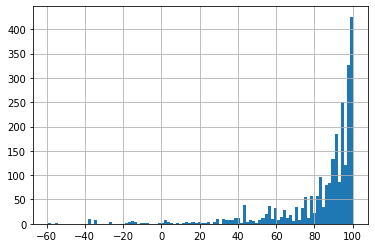

In [29]:
data.similarity.hist(bins=100)

In [30]:
data[data['before_merge_clean'] == data['after_merge_clean']].shape

(145, 15)

In [31]:
data[data['similarity'] == 100].shape

(185, 15)

In [32]:
simialrity_notnull_mask = (data['similarity'].notnull())
similarity_100_mask = (data['similarity'] == 100)
equals_code_mask = (data['before_merge_clean'] == data['after_merge_clean'])

In [33]:
new[equals_code_mask & ~similarity_100_mask  & simialrity_notnull_mask].shape

(0, 11)

In [34]:
new[~equals_code_mask & similarity_100_mask & simialrity_notnull_mask].shape

(42, 11)

In [36]:
print(data[~equals_code_mask & similarity_100_mask & simialrity_notnull_mask].iloc[0]['before_merge_clean'])

    def _init_counters(self, n_effective_classes, n_features):
        self.class_count_ = np.zeros(n_effective_classes, dtype=np.float64)
        self.feature_count_ = np.zeros((n_effective_classes, n_features),
                                       dtype=np.float64)



In [37]:
print(data[~equals_code_mask & similarity_100_mask & simialrity_notnull_mask].iloc[0]['after_merge_clean'])

    def _init_counters(self, n_classes, n_features):
        self.class_count_ = np.zeros(n_classes, dtype=np.float64)
        self.feature_count_ = np.zeros((n_classes, n_features),
                                       dtype=np.float64)



### Посмотрим на синтетических примерах

In [40]:
func_sources = [
    [
        'def a(b, c, d):\n    x = b + c\n    y = c + d\n    z = x + y\n    return z', 
        'def b(c, d, e):\n    x = c + d\n    y = d + e\n    z = x + y\n    return z',
        'names_changed'
    ],
    [
        'def a(b, c, d):\n    y = c + d\n    x = b + c\n    z = x + y\n    return z', 
        'def b(c, d, e):\n    x = c + d\n    y = d + e\n    z = x + y\n    return z',
        'lines_order_changed'
    ],
    [
        'def a(b, c, d):\n    y = c + d\n    x = b + c\n    z = x + y\n    return z', 
        'def b(c, d, e):\n    x = c + d\n    y = e + d\n    z = x + y\n    return z',
        'lines_order_and_operation_arguments_changed'
    ],
    [
        'def a(b, c, d):\n    x = b + c\n    y = c + d\n    z = x + y\n    return z', 
        'def b(c, d, e):\n    x = c + d\n    y = d + e\n    z = x - y\n    return z',
        'operation_changed'
    ]
]

In [41]:
for i, (fs1, fs2, func_name) in enumerate(tqdm(func_sources)):
    try:
        submissions = [get_normed_content_for_src(f'{func_name}_{i}', f) for i, f in enumerate([fs1, fs2])]

        pairs = [get_pair_stats(pair) for pair in itertools.combinations(submissions, 2)]
        pairs.sort(key=lambda a: -a[0])
        for sim, dld, a, b in pairs:
            print(f"Detected pair similarity of {int(sim)}% with edit distance of {dld} for {a[0]} and {b[0]}\n")
    except SyntaxError as e:
        print(f'Error in func {func_name}, index: {i}, error: {e}')

Detected pair similarity of 100% with edit distance of 0 for names_changed_0 and names_changed_1

Detected pair similarity of 96% with edit distance of 4 for lines_order_changed_0 and lines_order_changed_1

Detected pair similarity of 97% with edit distance of 3 for lines_order_and_operation_arguments_changed_0 and lines_order_and_operation_arguments_changed_1

Detected pair similarity of 99% with edit distance of 1 for operation_changed_0 and operation_changed_1


